# Employee Satisfaction and Attrition RFC

Let's take a look at a dataset from Kaggle on employee satisfaction and attrition. This is a synthetic dataset created by IBM data scientists to study models of employee attrition. It demonstrates a variety of important real-world variables that HR departments track across the country, and it will work great for our purposes. Presumably this was constructed around actual data they track at IBM.

In this analysis, we will take a look at the data and create an RFC for potential action to take in the company to reduce attrition.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

## Step 1: Explore the Data

In [2]:
employee_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

print('Total entries: ' + str(len(employee_data)))
employee_data.head(5)

Total entries: 1470


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
list(employee_data.columns.values)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

There is a lot going on here. This is a Kaggle dataset designed for attrition prediction (https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). We'll use it to try to actively reduce attrition, rather than model it. There are 1470 entries and 34 features (Attrition excluded). A lot of these features are observable but not changeable: Marital Status, Gender, Performance Rating. A few could be altered to try to entice employees to stay: Environmental Satisfaction, Monthly Income, Work Life Balance. 

Let's just look at one of those variables, Environmental Satisfaction (ES), and see how it relates to attrition. 

In [4]:
employee_data.EnvironmentSatisfaction.head(5)

0    2
1    3
2    4
3    4
4    1
Name: EnvironmentSatisfaction, dtype: int64

In [5]:
employee_data.Attrition.replace(['Yes', 'No'], [1, 0], inplace=True)
employee_data.Attrition.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [6]:
employee_data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

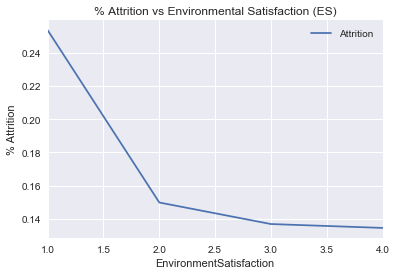

,Attrition
EnvironmentSatisfaction,
1,0.253521
2,0.149826
3,0.136865
4,0.134529


In [7]:
fig = employee_data[['Attrition', 'EnvironmentSatisfaction']].groupby('EnvironmentSatisfaction').mean().plot()
plt.title('% Attrition vs Environmental Satisfaction (ES)')
plt.ylabel('% Attrition')
plt.show()

employee_data[['Attrition', 'EnvironmentSatisfaction']].groupby('EnvironmentSatisfaction').mean()

Environment Satisfaction looks like a good variable to focus on: There is a clear correlation between ES and attrition, and we can do something about it in the office. Part of what is interesting about this plot is that once ES is 2 or higher, there's very little change in attrition. This allows us to focus on the very lowest scores and potentially have a big impact.

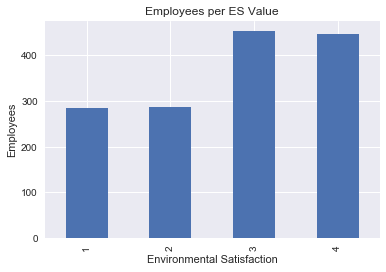

1    284
2    287
3    453
4    446
Name: EnvironmentSatisfaction, dtype: int64

In [8]:
employee_data.EnvironmentSatisfaction.value_counts().sort_index().plot(kind='bar')
plt.title('Employees per ES Value')
plt.ylabel('Employees')
plt.xlabel('Environmental Satisfaction')
plt.show()

employee_data.EnvironmentSatisfaction.value_counts().sort_index()

## Step 2: The Problem

Employees who rate Environmental Satisfaction (ES) as a 1 out of 4 ('ES=1') have 88% higher attrition than those who rate it 4 of 4 ('ES=4'), and 69% higher attrition than those who rate it 2 of 4 ('ES=2'). This is an opportunity: even just slightly increasing the very lowest ES ratings has the potential to reduce attrition. Money well spent.

The dataset includes 284 employees who rated ES=1, or 19.3% of the total workforce. For every 100 employees with ES=1, about 25 will leave. For every 100 employees in the ES=2 group, we only expect 15 of them to leave. 

Based on this simplified analysis (i.e., that ES is the only factor in attrition, and directly *causes* attrition), we have the potential to retain 10 employees for every 100 employees who move from ES=1 to ES=2. The dataset shows 237 of the 1470 respondents leave the company, so reducing that number by ten would mean going from 16.1% to 15.4% attrition (assuming the company stays at 1470 employees, and employees who leave are replaced with similar employees). 

If we were to include other factors as well, our model may allow us to be more precise targeting employees to spend extra resources on trying to retain. 

# Step 3: Potential Solutions

Our two options for A/B testing would be to test over a set amount of time, or to test on a certain subset of employees. Testing on a subset of employees may lead to a couple of issues. First of all, some employees may feel left out if they see their colleagues' environmental conditions improved, possibly increasing attrition for the control group. 

Second, we will run into issues of statistical significance. Because we're dealing with relatively small numbers of employees (we're looking to retain a couple dozen at most), it will be a challenge to show significance when comparing that to the workforce as a whole. Because of this, it will be beneficial to have as large a test group as possible. More discussion (and math) on this later.

Because we already have survey responses, I would recommend using the existing survey as the control group, and testing the new environmental conditions on the whole company. If this was cost-prohibitive, we could try to pinpoint where ES=1 employees work, and improve those areas first. The danger of rolling out a new plan on an entire group is that it will be ineffective, or actually have the opposite effect we expect, and we'll be worse off than before. I think we will be safe in this case. It is hard to imagine that a well-implemented office beautification plan would cause more employees to leave (although we'll still want to be actively aware of reactions to the changes). 

### Issues and Biases

Environmental Satisfaction suffers from issues and biases that are common with self-reported data. We can't fully know what a respondent intends to communicate with his answer, and different people have different standards.

Also, we are also assuming that correlation implies causation: that attrition is higher for ES=1 *because* ES=1. We need to be careful here. It may be that employees who are already dissatisfied with their jobs are more like to report lower scores, regardless of actual environmental satisfaction. Improving environmental conditions for those employees may be a lost cause. However, it does make intuitive sense that employees who appreciate their physical workspace are more likely to stay. A quick scan of research in the field would allow us to confirm that intuition. (http://www.ijecbs.com/January2011/N4Jan2011.pdf)

Finally, Environmental Satisfaction is amorphous. Depending on how that survey question was phrased, it may mean very different things to different people. Is it physical environment? Emotional environment, perhaps due to the team or manager the employee works with? Because we don't have access to the original survey (it didn't exist), we'll assume that the question was well-designed and focused on the physical work environment.

### How do we do it?

Even so, how do we decide what actions to take in the office? Let's ask employees.

We'll survey employees who rated ES=1 or 2 and ask what could be better. We'll survey employees who rated ES=3 or 4 and ask what is working well for them. Based on these surveys and/or conversations, we'll come up with three actionable environmental changes to make.

For the purposes of this proposal, let's say we find that the three items we decide on are more plants, better access to healthy snacks, and dedicated wall space for employees to display art their kids made.

### The Hypothesis

Before we hammer out a concrete hypothesis, let's take a quick look at statistical significance. In our "best case" scenario, all ES=1 employees will move to ES=2 *AND* this will reduce the attrition of those employees from 25% to 15%. With 284 of our 1470 employees in the ES=1 group, this would result in 28 of the 237 employees who leave to stay instead. Since we're ultimately interested in total attrition in the company, we compare 237 of 1470 to 209 of 1470. We'll use the Mann-Whitney U-test, as the distribution of attrition is not normal. 

In [9]:
before = np.zeros(1470) #The control group: Attrition is 237 of 1470
before[:237] = 1

after = np.zeros(1470)  #Best case scenario: Attrition is 209 of 1470
after[:209] = 1

stats.mannwhitneyu(before, after)

MannwhitneyuResult(statistic=1059870.0, pvalue=0.075042019621192793)

This is an issue. Even in our best case scenario, we will only be 92% sure that these two groups come from different populations (i.e., our changes made a difference). We can also look at the data in another way. We aren't trying to change attrition rates for employees with ES=3 or ES=4, so let's see what happens when we exclude them from the analysis. (Note: this also constrains us to assuming that no ES=2 will move up to 3 or 4). 

In [10]:
before = np.zeros(571) #The control group: Attrition only for ES=1 or 2: 115 of 571
before[:115] = 1

after = np.zeros(571)  #Best case test group: Attrition reduced by 28: 87 of 571
after[:87] = 1

stats.mannwhitneyu(before, after)

MannwhitneyuResult(statistic=155026.5, pvalue=0.014989357114257699)

By eliminating two-thirds of our employees from the analysis, we risk cherry-picking for the data we want. On the other hand, those employees aren't the focus of our test, and we're able to achieve a significant p-value without them. Let's include both analyses in our evaluation, but focus our hypothesis on the second, more statistically significant approach.

**Hypothesis: Improving environmental satisfaction enough to bring all ES=1 employees to ES=2 will reduce attrition among ES=1 and ES=2 employees from 20% to 15%.**

## Step 4: Methodology and Evaluation

So, we've installed new plants, maintained healthy snack stations, and built an art wall full of children's masterpieces. What now?

Over the year that the experiment is running, we will survey Environmental Satisfaction to make sure our improvements are having the desired effect of bringing ES=1 respondents up to ES=2 or higher. If ES isn't increasing, we can try a couple other methods gleaned from our conversations to see if they help more (although it may be that certain aspects are structurally too difficult to change, like access to natural light). If we can't seem to budge ES, we may have discovered that something else is driving the responses -- perhaps low employee engagement, morale, or team support.

If ES does increase, we're on track. Either way, what we're ultimately interested in is attrition. At the end of the year, we'll administer the same survey which gave us our dataset. With these two datasets (before and after environmental changes), we can begin analysis. 

### Statistical Tests

We'll begin by looking a the null hypothesis: attrition rates remain unchanged before and after our environmental intervention. We can run a Mann-Whitney U-test on these two populations, as the distribution is not normal. Ideally, we're looking for (p < 0.05) in order to be confident that our experiment was a success, however, this level of confidence will be very difficult to achieve in all but best case scenario. We'll look at the levels of attrition for both the company at large, and the subset of ES=1 or 2. Let's look at an example where 150 employees (rather than att 284) moved from ES=1 to ES=2, and attrition rates stayed the same for those two groups (25% for ES=1 and 15% for ES=2).

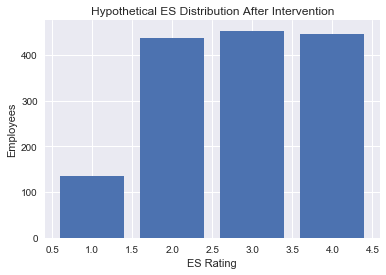

In [11]:
delta = 150  #Number of employees moving from ES=1 to ES=2

plt.bar([1, 2, 3, 4], [284-delta, 287+delta, 453, 446])
plt.ylabel('Employees')
plt.xlabel('ES Rating')
plt.title('Hypothetical ES Distribution After Intervention')
plt.show()

In [12]:
# First, let's look at the null hypothesis. Are the before/after samples from the same population?

# ES=1 now includes only 134 employees, ES=2 is 437. Total = 571
# Attrition for ES=1 is 134 * 0.25 = 34
# Attrition for ES=2 is 437 * 0.15 = 66   Total Attrition: 100

before = np.zeros(571) #Control group: 115 of 571
before[:115] = 1

after = np.zeros(571)  #Test group: 100 of 571
after[:100] = 1

stats.mannwhitneyu(before, after)

MannwhitneyuResult(statistic=158738.0, pvalue=0.12822685370944842)

In [13]:
# And now looking at the company as a whole
# N.B. We expect to be less confident when looking at the larger group.

before = np.zeros(1470) #Control group: Before intervention: 237 of 1470
before[:237] = 1

after = np.zeros(1470)  #Test group: Attrition reduced by 15: 222 of 1470
after[:222] = 1

stats.mannwhitneyu(before, after)

MannwhitneyuResult(statistic=1069425.0, pvalue=0.22303175114308998)

At this level of conversion from ES=1 to ES=2, p=0.13, so we're not able to say with 95% confidence that our interventions have caused a decrease in attrition. Does that mean the test is a failure? I'd say not. Based on the relative low cost of the environmental changes we're looking at and the high cost of replacing employees, I would argue that the test is a success even if the result is only a fraction of the best case scenario. 

The cost associated with the attrition of 15 extra employees is on the order of \$500,000 (assuming $35,000 per employee, which is probably low considering severance, lost time, rehiring and retraining). Keeping a handful of employees, and potentially improving the quality of life for many more, pays off. It may also have other benefits we could measure simultaneously: improved productivity, increased recruiting potential. These would be important variables to track through the HR department.

Another possible result is that we will see many employees move from ES=1 to ES=2, but rather than reducing attrition, it will simply be transferred over to the group of ES=2. This would suggest that Environmental Satisfaction does *not* cause attrition, which would be interesting in its own right.

### Next Steps

In order to improve statistical significance, we can track attrition over a longer period of time by administering this same survey twice a year. Other things will certainly change as well over that time period, which may muddy the results, however, it would be valuable to see if our efforts were truly effective. With a sample size this small, we're going to run into this issue no matter what.

It would also be valuable to model *all* of the data, not just Environmental Satisfaction, and create a Flight Risk score for each employee. We may find that there are certain employees who will stay if we take actions to improve their working conditions, and certain employees who are likely to leave no matter what we do. Both of these would be important to know, and could help inform conversations with supervisors and HR.

In the end, attrition reflects both the quality of our company, and the type of employee we hire, and should be monitored closely.